In [ ]:
# Imports necesarios para el notebook
from random import seed

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm
from tp1.algoritmo_greedy import elecciones_sophia
from collections import deque

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
seed(12345)
np.random.seed(12345)

sns.set_theme()


ImportError: attempted relative import with no known parent package

# Conjunto de datos variando la cantidad de monedas

## Primera medicion

Primero mediremos para arreglos de tamaños entre 100 y 100000 de monedas con valores de entre 0 y 2000.

In [ ]:
def get_random_array(size: int):
    return deque(np.random.randint(0, 2000, size))

x = np.linspace(100, 500_000, 20).astype(int)

results = time_algorithm(elecciones_sophia, x, lambda s: [get_random_array(s)])

Antes de empezar:
Uso de memoria: 177.74 MB
Procesando tamaño: 100
Uso de memoria: 177.74 MB
Procesando tamaño: 26410
Uso de memoria: 178.61 MB
Procesando tamaño: 52721
Uso de memoria: 189.54 MB
Procesando tamaño: 79031
Uso de memoria: 214.77 MB
Procesando tamaño: 105342
Uso de memoria: 245.84 MB
Procesando tamaño: 131652
Uso de memoria: 289.42 MB
Procesando tamaño: 157963
Uso de memoria: 343.19 MB
Procesando tamaño: 184273
Uso de memoria: 405.58 MB
Procesando tamaño: 210584
Uso de memoria: 477.24 MB
Procesando tamaño: 236894
Uso de memoria: 560.48 MB
Procesando tamaño: 263205
Uso de memoria: 660.71 MB
Procesando tamaño: 289515
Uso de memoria: 767.46 MB
Procesando tamaño: 315826
Uso de memoria: 879.37 MB
Procesando tamaño: 342136
Uso de memoria: 1005.88 MB
Procesando tamaño: 368447
Uso de memoria: 1144.56 MB
Procesando tamaño: 394757
Uso de memoria: 1290.26 MB
Procesando tamaño: 421068
Uso de memoria: 1445.79 MB
Procesando tamaño: 447378
Uso de memoria: 1614.78 MB
Procesando tamaño: 47

Tiempos de ejecución:

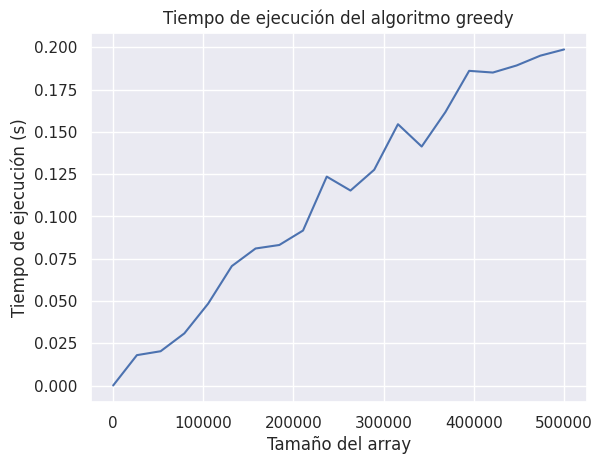

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo greedy')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

Vamos entonces a calcular el ajuste por cuadrados mínimos a traves de la biblioteca scipy:

In [ ]:
f_n = lambda x, c1, c2: c1 * x  + c2 

c, _ = sp.optimize.curve_fit(f_n, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 4.1531874028814316e-07, c_2 = 0.007242762351344593
Error cuadrático total: 0.0016081753392167529


Vamos a graficar los datos y el ajuste para corroborar que efectivamente se ajusta bien:

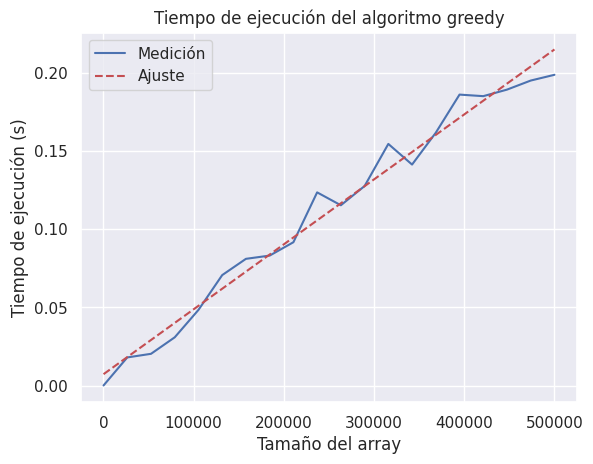

In [ ]:
ax.plot(x, [c[0] * n  + c[1] for n in x], 'r--', label="Ajuste")
ax.legend()
fig

Y por ultimo, el error que se comete por cada cantidad de monedas.

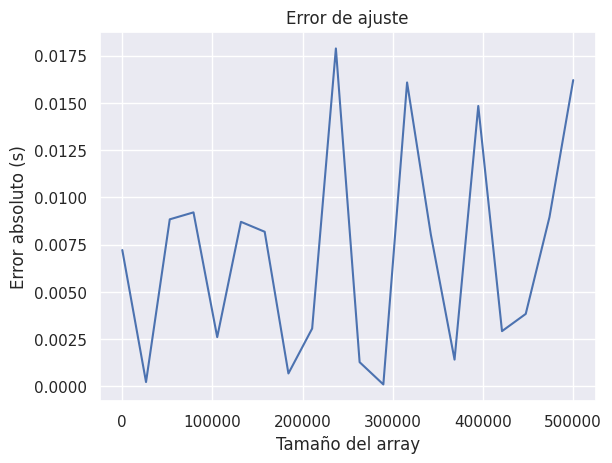

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n  + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

Puede verse que el error es pequeño y que la complejidad del algoritmo greedy se comporta como $O(n)$

## Segunda medicion

Se hará una medición similar a la anterior, con la intención de ver cómo afecta la variablidad de los valores de las monedas al algoritmo. Para esto los valores de las monedas irán desde 1000000000 hasta 1000002000.

In [ ]:
def get_random_array(size: int):
    return deque(np.random.randint(1000000000, 1000002000, size))

x = np.linspace(100, 500_000, 20).astype(int)

results_monedas_grandes = time_algorithm(elecciones_sophia, x, lambda s: [get_random_array(s)])

Antes de empezar:
Uso de memoria: 772.12 MB
Procesando tamaño: 100
Uso de memoria: 772.12 MB
Procesando tamaño: 26410
Uso de memoria: 772.35 MB
Procesando tamaño: 52721
Uso de memoria: 772.55 MB
Procesando tamaño: 79031
Uso de memoria: 772.55 MB
Procesando tamaño: 105342
Uso de memoria: 772.55 MB
Procesando tamaño: 131652
Uso de memoria: 772.55 MB
Procesando tamaño: 157963
Uso de memoria: 772.55 MB
Procesando tamaño: 184273
Uso de memoria: 807.71 MB
Procesando tamaño: 210584
Uso de memoria: 863.31 MB
Procesando tamaño: 236894
Uso de memoria: 929.14 MB
Procesando tamaño: 263205
Uso de memoria: 1003.84 MB
Procesando tamaño: 289515
Uso de memoria: 1088.41 MB
Procesando tamaño: 315826
Uso de memoria: 1178.39 MB
Procesando tamaño: 342136
Uso de memoria: 1278.28 MB
Procesando tamaño: 368447
Uso de memoria: 1387.30 MB
Procesando tamaño: 394757
Uso de memoria: 1503.84 MB
Procesando tamaño: 421068
Uso de memoria: 1628.84 MB
Procesando tamaño: 447378
Uso de memoria: 1764.24 MB
Procesando tamaño:

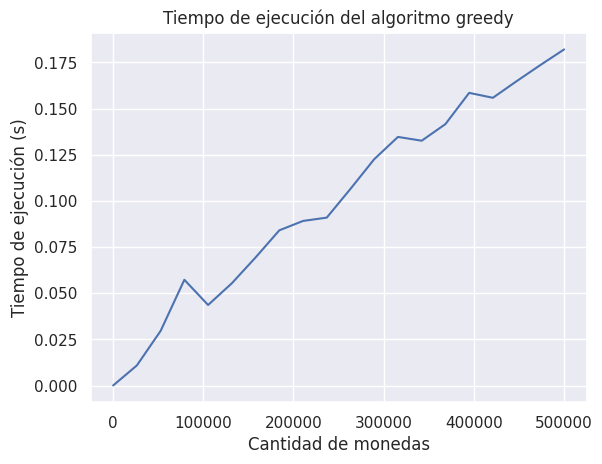

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results_monedas_grandes[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo greedy')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Tiempo de ejecución (s)')
None

c_1 = 4.1531874028814316e-07, c_2 = 0.007242762351344593
Error cuadrático total: 0.001047506993205995


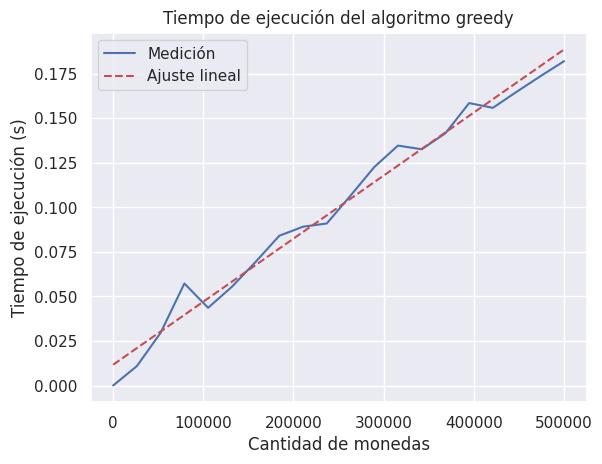

In [ ]:
c_monedas_grandes, _ = sp.optimize.curve_fit(f_n, x, [results_monedas_grandes[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c_monedas_grandes[0] * x + c_monedas_grandes[1] - [results_monedas_grandes[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

# Graficamos el ajuste
ax.plot(x, [c_monedas_grandes[0] * n + c_monedas_grandes[1] for n in x], 'r--', label="Ajuste lineal")
ax.legend()
fig


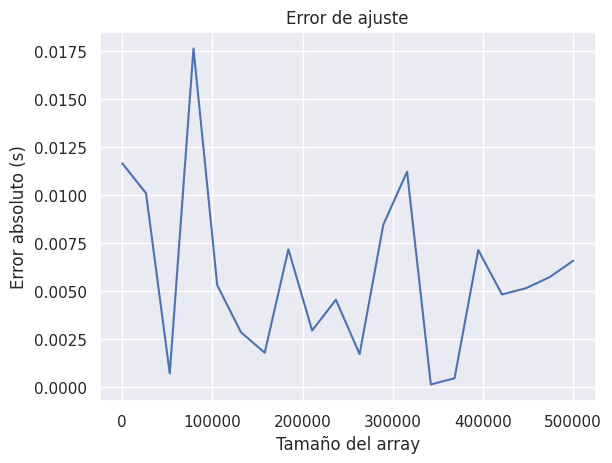

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c_monedas_grandes[0] * n + c_monedas_grandes[1] - results_monedas_grandes[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

### Comparando mediciones

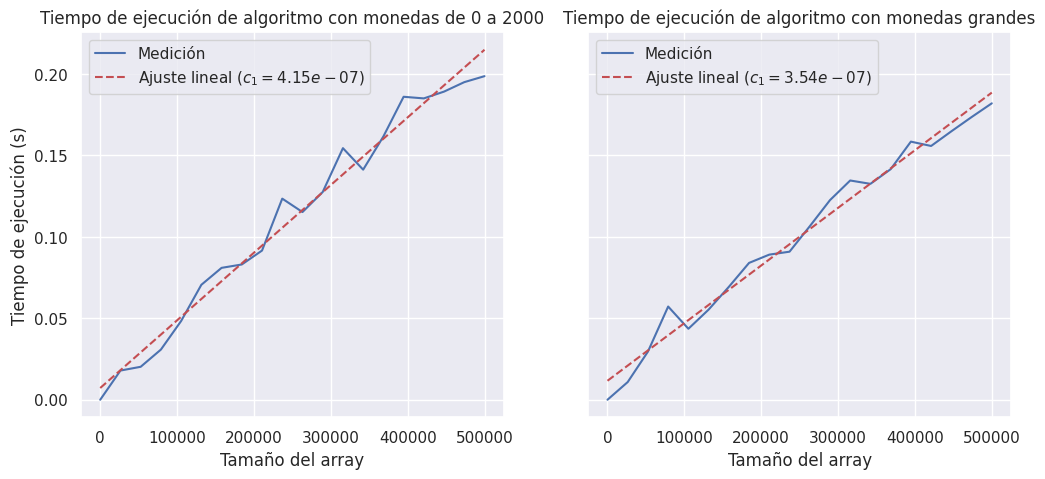

In [ ]:
axs: tuple[plt.Axes, plt.Axes]
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].plot(x, [results[n] for n in x], label="Medición")
axs[0].plot(x, [f_n(n, c[0], c[1]) for n in x], 'r--', label=f"Ajuste lineal ($c_1 = {c[0] :.2e}$)")
axs[0].set_title('Tiempo de ejecución de algoritmo con monedas de 0 a 2000')
axs[0].set_xlabel('Tamaño del array')
axs[0].set_ylabel('Tiempo de ejecución (s)')
axs[0].legend()

axs[1].plot(x, [results_monedas_grandes[n] for n in x], label="Medición")
axs[1].plot(x, [f_n(n, c_monedas_grandes[0], c_monedas_grandes[1]) for n in x], 'r--', label=f"Ajuste lineal ($c_1 = {c_monedas_grandes[0] :.2e}$)")
axs[1].set_title('Tiempo de ejecución de algoritmo con monedas grandes')
axs[1].set_xlabel('Tamaño del array')
axs[1].legend()
None